In [1]:
%matplotlib inline
import math
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import pickle

In [2]:
plt.rcParams['figure.figsize'] = 40, 15
plt.rcParams['axes.labelsize']=92
plt.rcParams['xtick.labelsize']=64
plt.rcParams['ytick.labelsize']=64
plt.rcParams['legend.loc']='lower right'
plt.rcParams['legend.fontsize'] = 48
plt.rcParams['lines.linewidth'] = 4
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1
plt.rcParams['grid.color'] = 'k'
plt.rcParams['boxplot.boxprops.linewidth'] = 6
plt.rcParams['boxplot.whiskerprops.linewidth']=6
plt.rcParams['boxplot.flierprops.markeredgewidth']=4
plt.rcParams['boxplot.capprops.linewidth'] =6
plt.rcParams['boxplot.medianprops.color']='C2'
plt.rcParams['boxplot.medianprops.linewidth'] =6
plt.rcParams['boxplot.meanprops.markersize'] = 20

In [3]:
modes = ['ind', 'iden', 'uni', 'fmax', 'fsum', 'buc_con', 'buc_qeq', 'buc_qsd']
mode_names = ['ind', 'iden', 'util', 'MEgal', 'WUtil', 'buc_con', 'buc_qeq', 'buc_qsd']
modes2 = ['iden', 'uni', 'fmax', 'fsum', 'buc_con', 'buc_qeq', 'buc_qsd']
modes3 = ['ind', 'iden', 'uni', 'fsum', 'buc_qsd']

In [4]:
data_path = './data/twoway_marginal_vary_d10_p2_k20_t10.pkl'
fo = open(data_path, 'rb')
data = pickle.load(fo)
fo.close()

In [5]:
total_errors = data['total_errors']
print(total_errors)

             ind     iden          uni         fsum       buc_con  \
0  257235.831133  34816.0  5512.538173  6021.379452  87267.655171   
1   62082.803774  24576.0  5078.700973  5113.451229  23157.582902   
2  275735.267915  38912.0  5460.719924  5758.865680  88601.273768   
3  162766.565392  28672.0  5312.427212  5504.157679  54806.328751   
4   12425.840366  12288.0  1649.259994  1282.473900   7030.417176   
5  159877.009673  28672.0  5446.071053  6079.669238  64380.576578   
6  253975.111443  32768.0  6676.656502  6921.524449  80682.445863   
7  124656.259273  26624.0  4360.391069  4640.381575  52753.058511   
8  267572.350896  36864.0  5401.486776  5766.845211  77747.054962   
9   67241.320356  22528.0  4699.703212  3792.843101  33885.194182   

        buc_qsd  
0  61338.330969  
1  15794.825152  
2  57641.771591  
3  41238.784366  
4   7299.056048  
5  51731.855171  
6  57048.885820  
7  40711.117988  
8  48609.454220  
9  25778.506854  


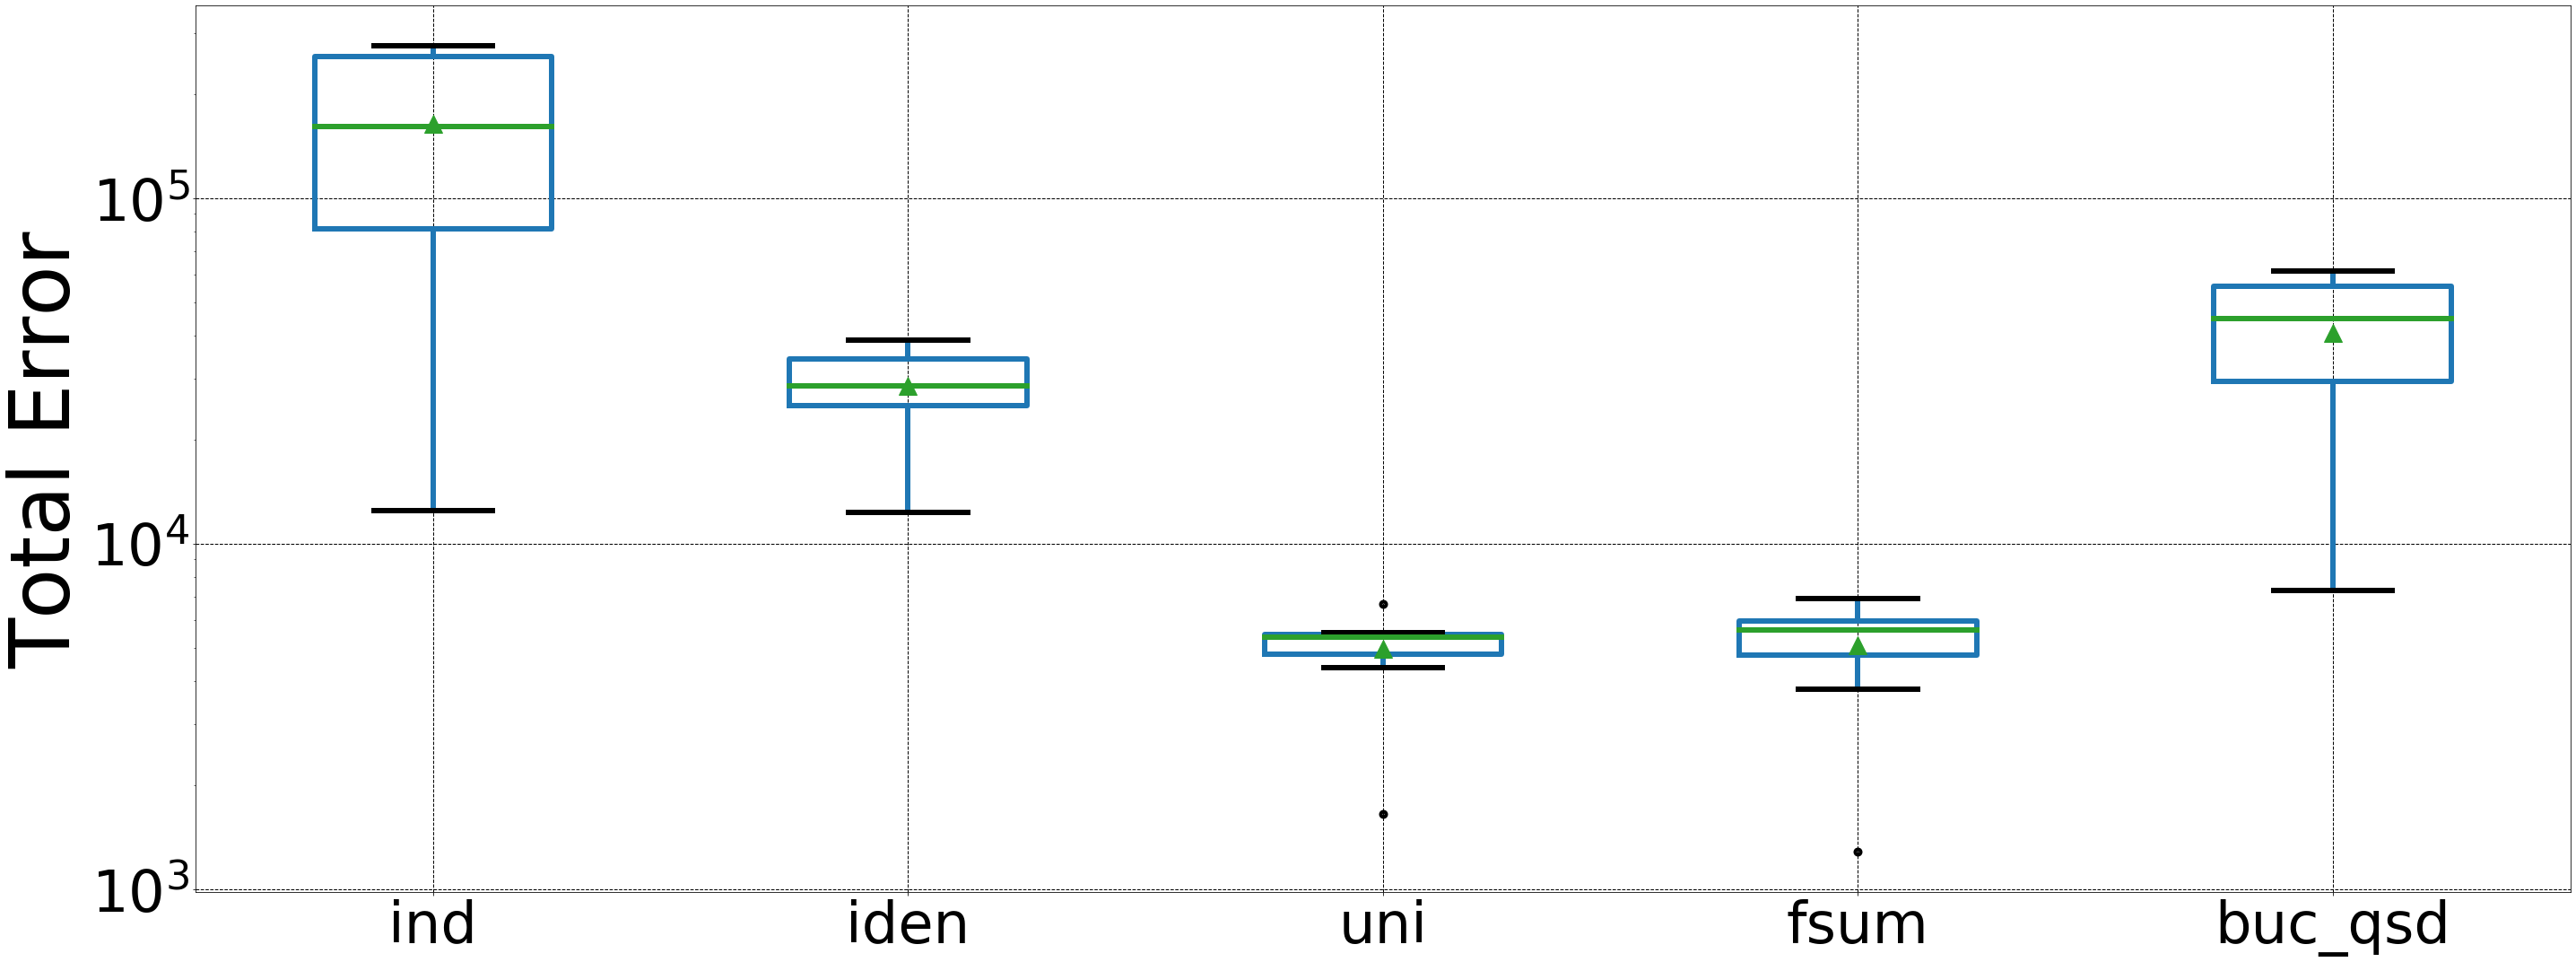

In [6]:
total_errors.boxplot(column = modes3, showmeans=True, meanprops={'color':'C3'})
plt.xticks(range(1,len(modes3)+1), modes3)
plt.yscale('log')
plt.ylabel('Total Error')
plt.tight_layout()
#plt.savefig('figs/race_total_errors.pdf')
plt.show()

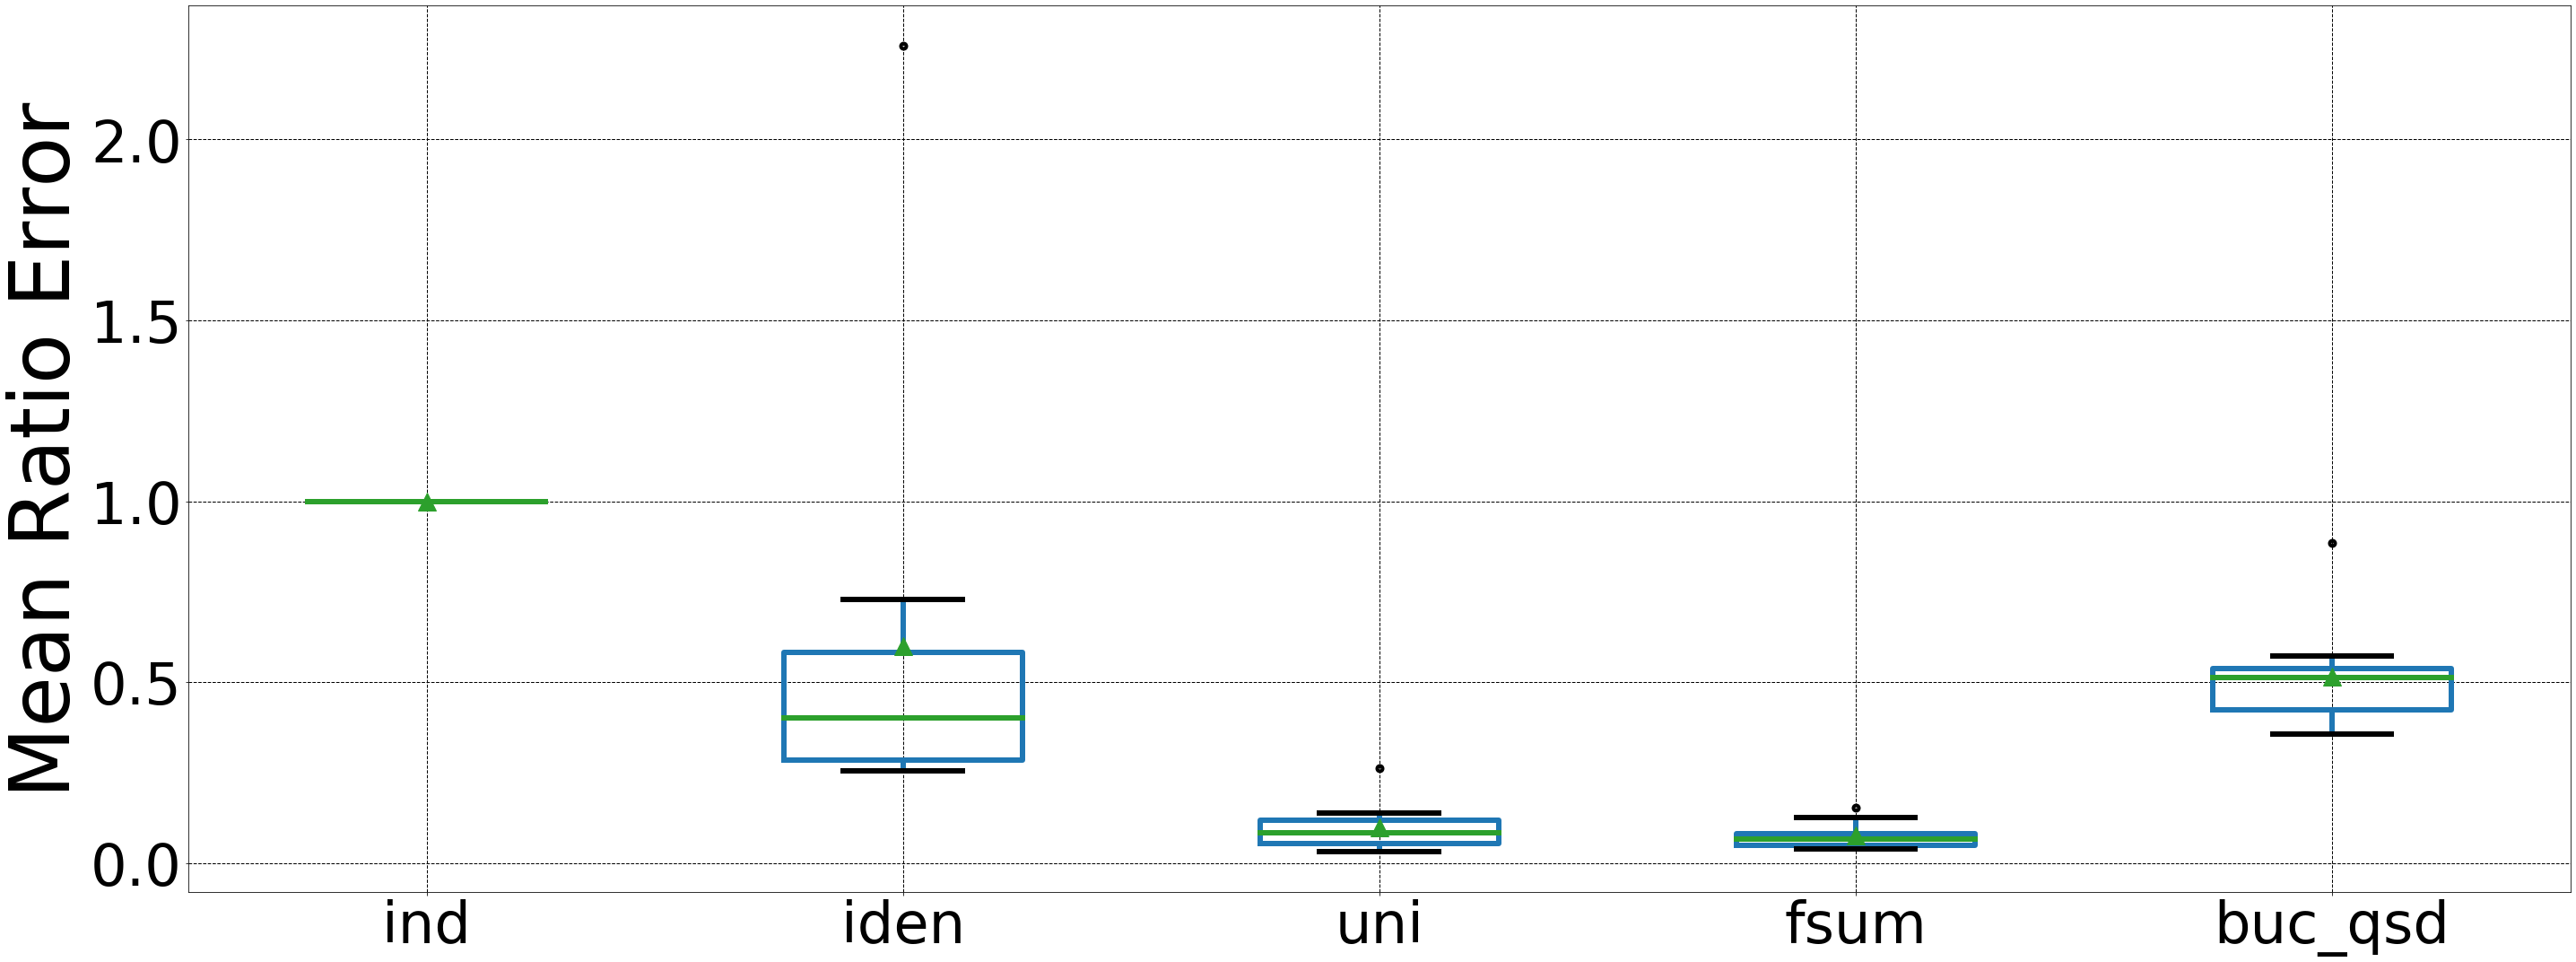

,ind,iden,uni,fsum,buc_con,buc_qsd
0,1.0,0.265350,0.048326,0.047552,0.607621,0.417089
1,1.0,0.613182,0.127462,0.124906,0.615350,0.500085
2,1.0,0.255124,0.031889,0.040527,0.585510,0.376478
3,1.0,0.450501,0.095289,0.076548,0.615737,0.539721
4,1.0,2.258262,0.262800,0.153575,0.637317,0.884752
5,1.0,0.353635,0.069303,0.061687,0.588790,0.572741
6,1.0,0.318645,0.079926,0.057384,0.580055,0.447680
7,1.0,0.489890,0.087901,0.073424,0.762481,0.523522
8,1.0,0.272525,0.046183,0.039230,0.490360,0.356262
9,1.0,0.729737,0.138810,0.083012,0.763400,0.526949


In [8]:
max_ratio_errors = data['max_ratio_errors']
max_ratio_errors.boxplot(column = modes3, showmeans=True)
plt.xticks(range(1,len(modes3)+1), modes3)

plt.ylabel('Mean Ratio Error')
plt.tight_layout()
#plt.savefig('figs/race_mean_ratio_errors.pdf')
plt.show()
max_ratio_errors

In [67]:

min_ratio_errors = data['min_ratio_errors']
diff_ratio_errors = max_ratio_errors.subtract(min_ratio_errors)

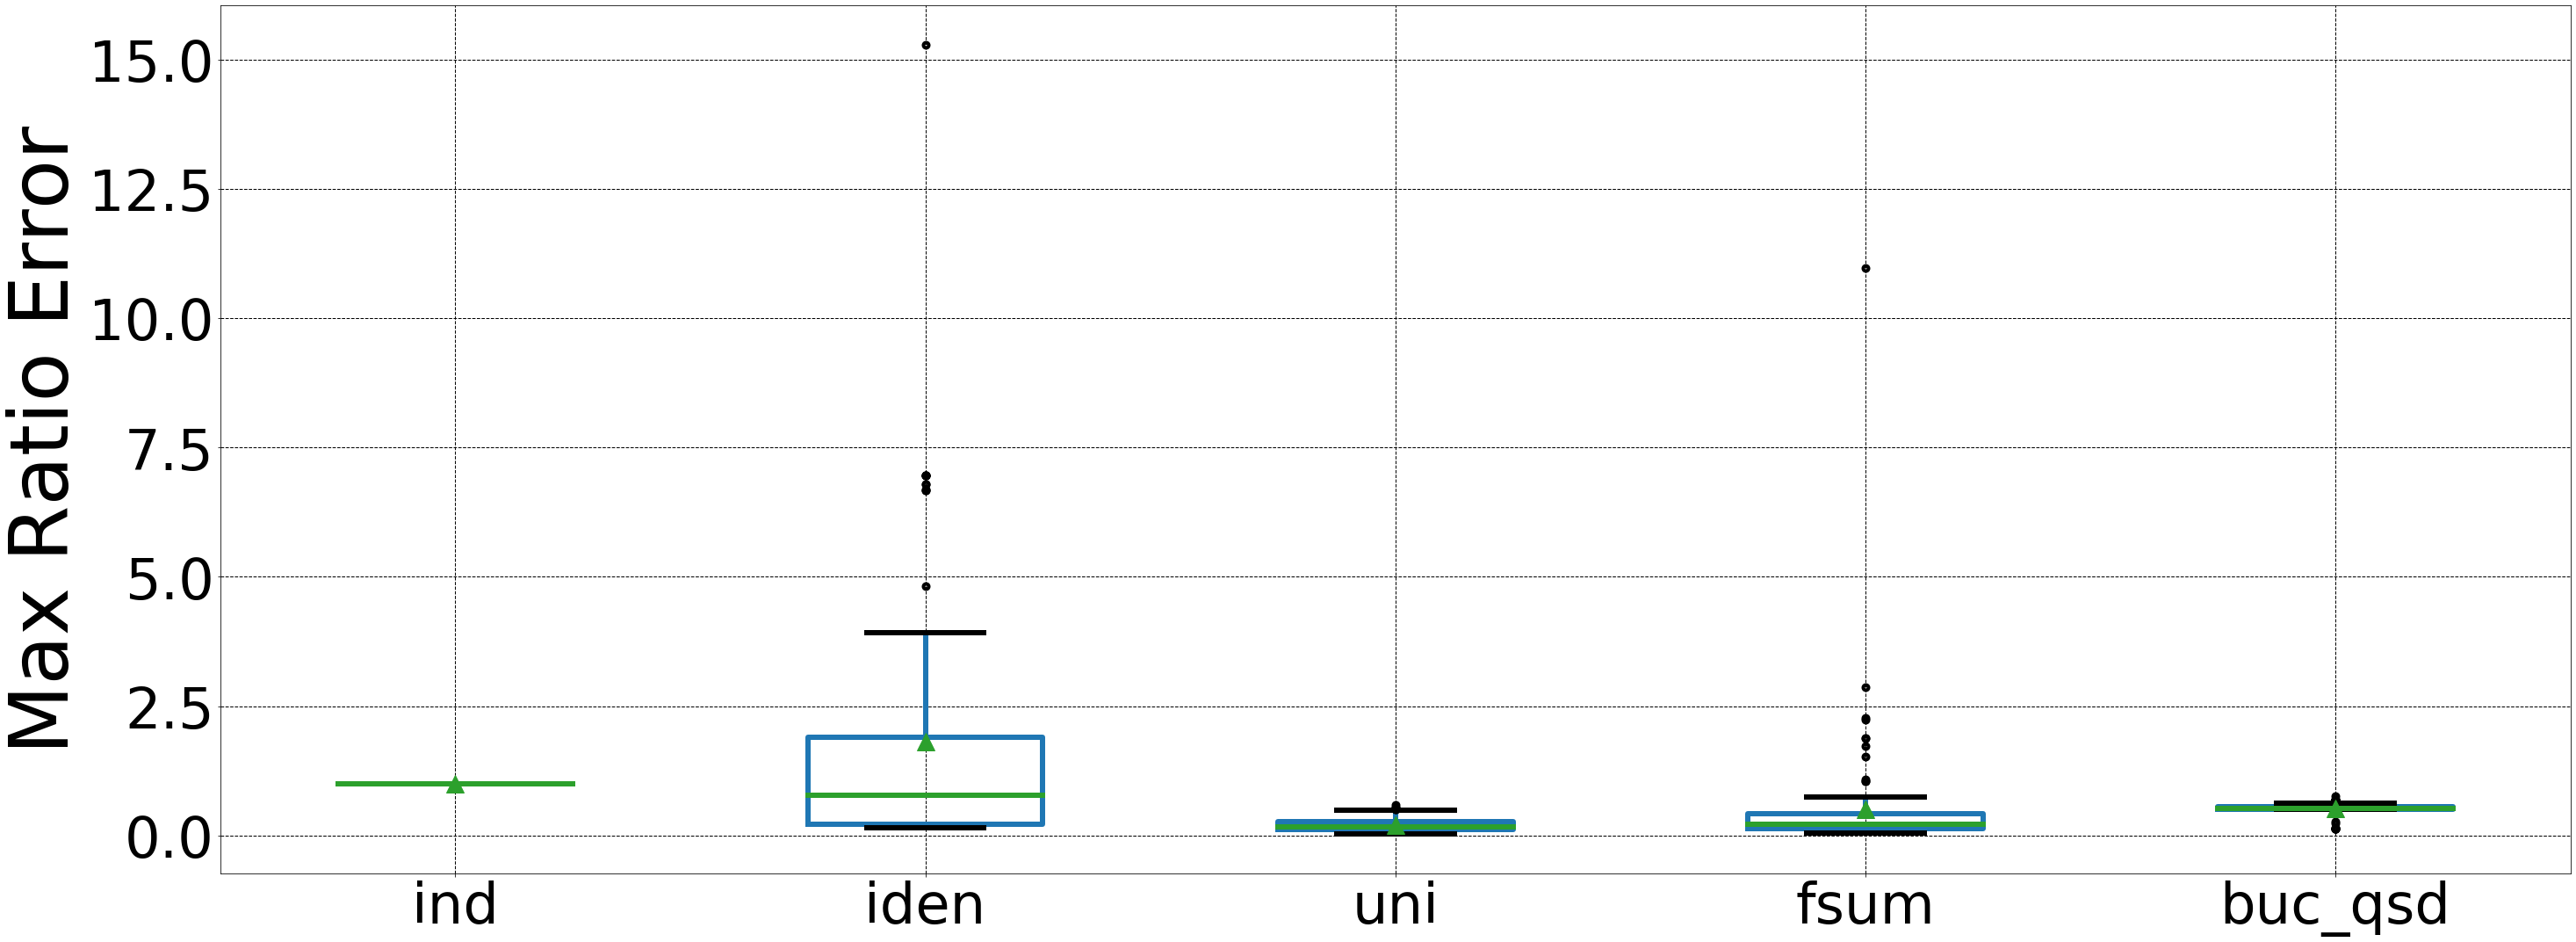

In [68]:
max_ratio_errors.boxplot(column = modes3, showmeans=True)
plt.xticks(range(1,len(modes3)+1), modes3)
plt.ylabel('Max Ratio Error')
plt.tight_layout()
#plt.savefig('figs/race_mean_ratio_errors.pdf')
plt.show()

KeyError: "['buc_con', 'buc_qeq', 'fmax'] not in index"

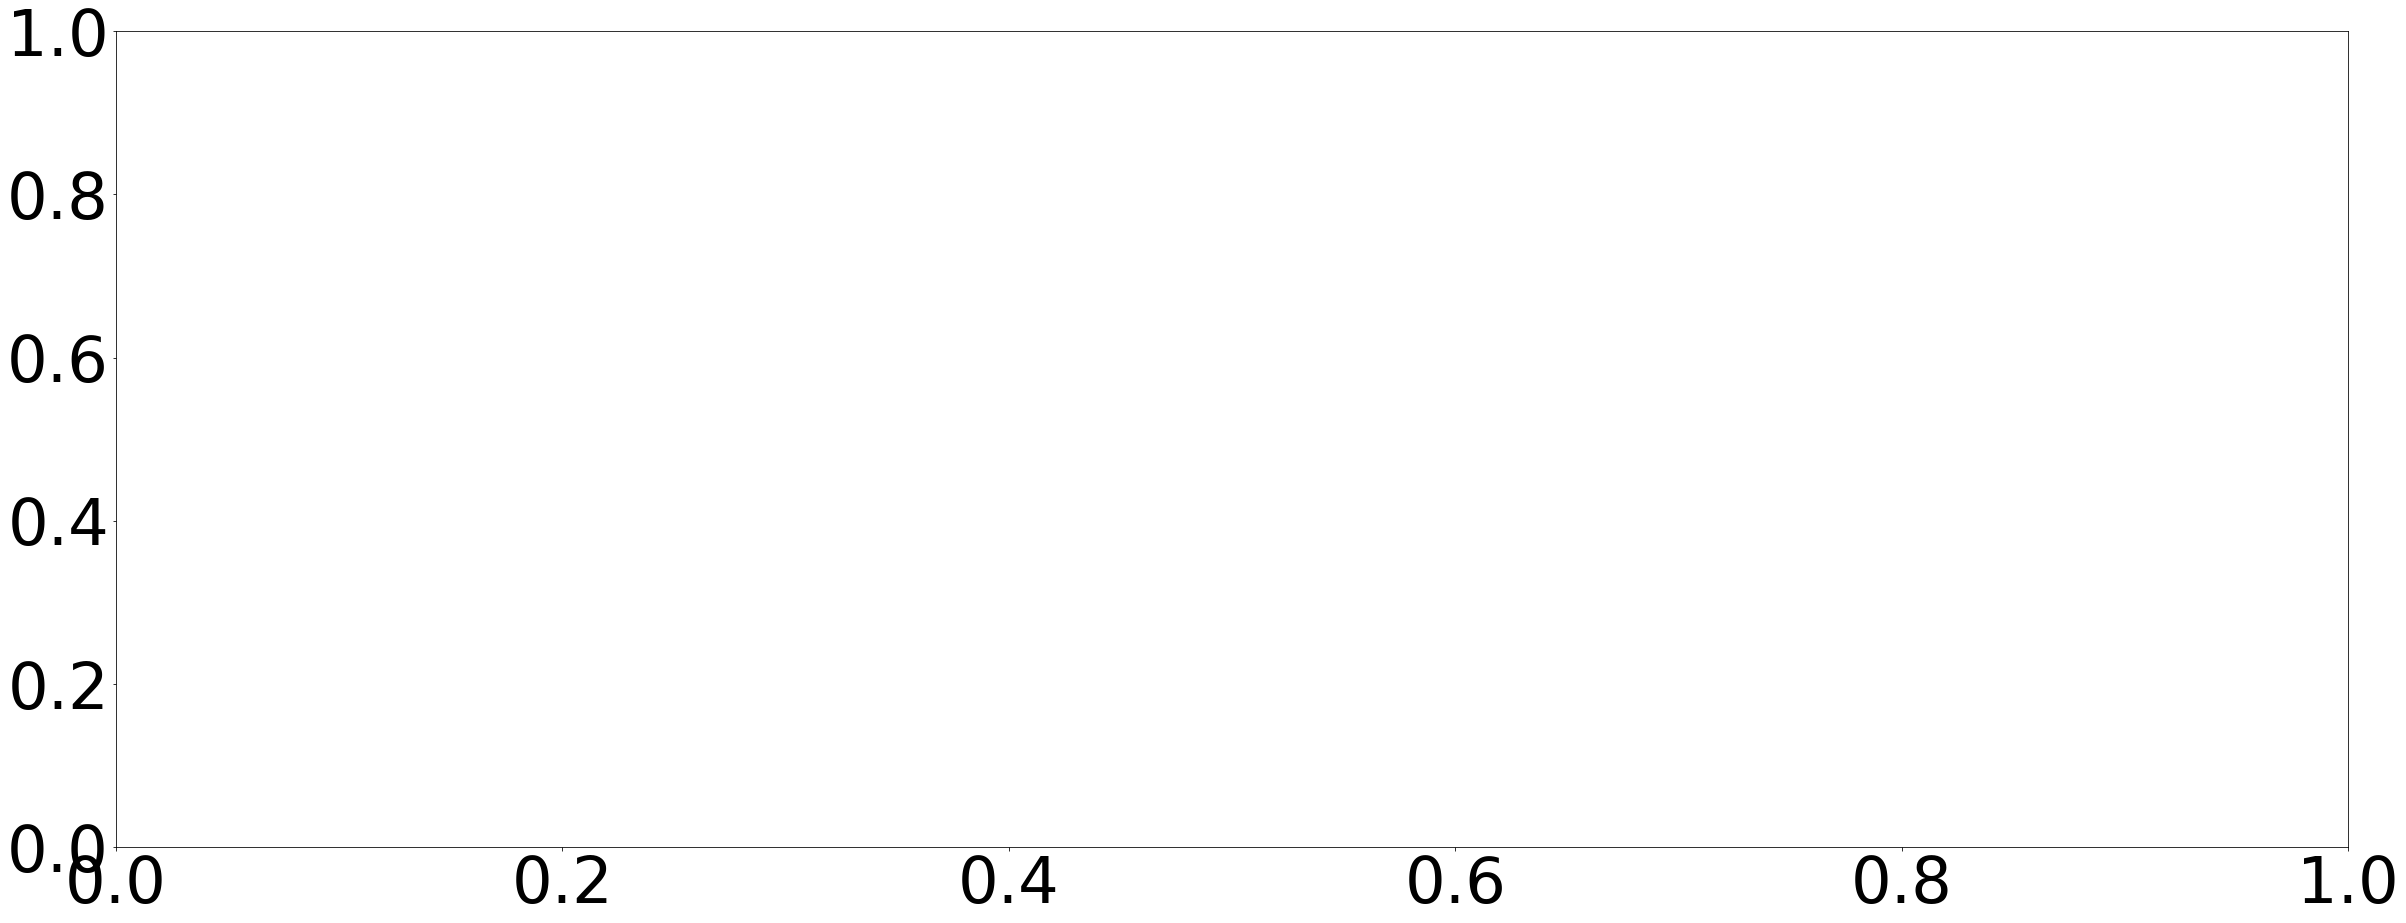

In [52]:
max_distances = data['max_distances']
min_distances = data['min_distances']
diff_distance = max_distances.subtract(min_distances)
diff_distance.boxplot(column=modes2, showmeans=True)
plt.xticks(range(1,len(modes)), mode_names[1:])
plt.ylabel('Max Difference')

plt.tight_layout()
#plt.savefig('figs/race_differences.pdf')
plt.show()

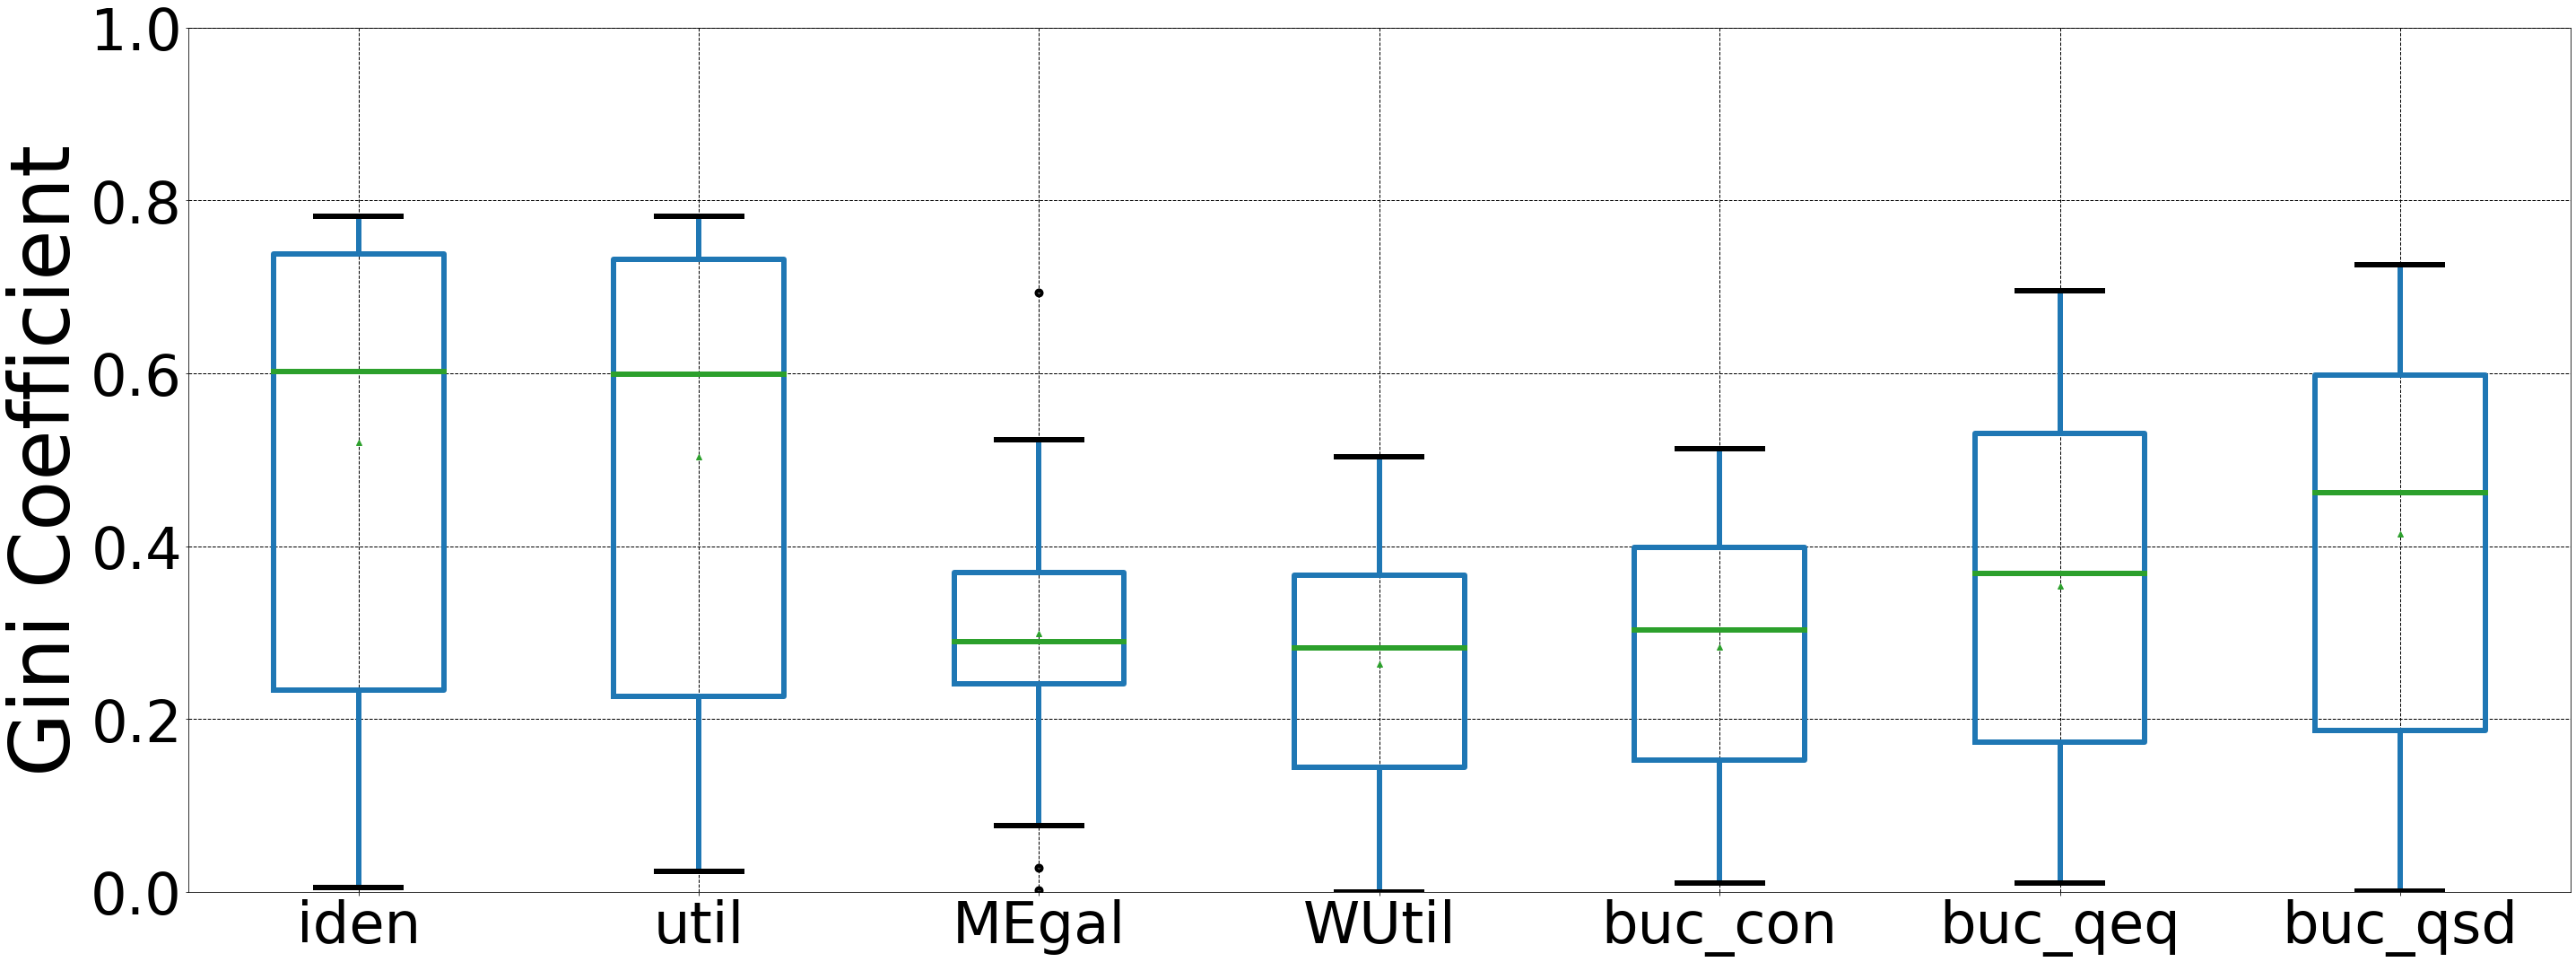

In [36]:
gini_coefficients = data['gini_coefficients']
gini_coefficients.boxplot(column=modes2, showmeans=True)
plt.xticks(range(1,len(modes)), mode_names[1:])
plt.ylim((0,1.0))
plt.ylabel('Gini Coefficient')
plt.tight_layout()
#plt.savefig('figs/race_gini.pdf')
plt.show()

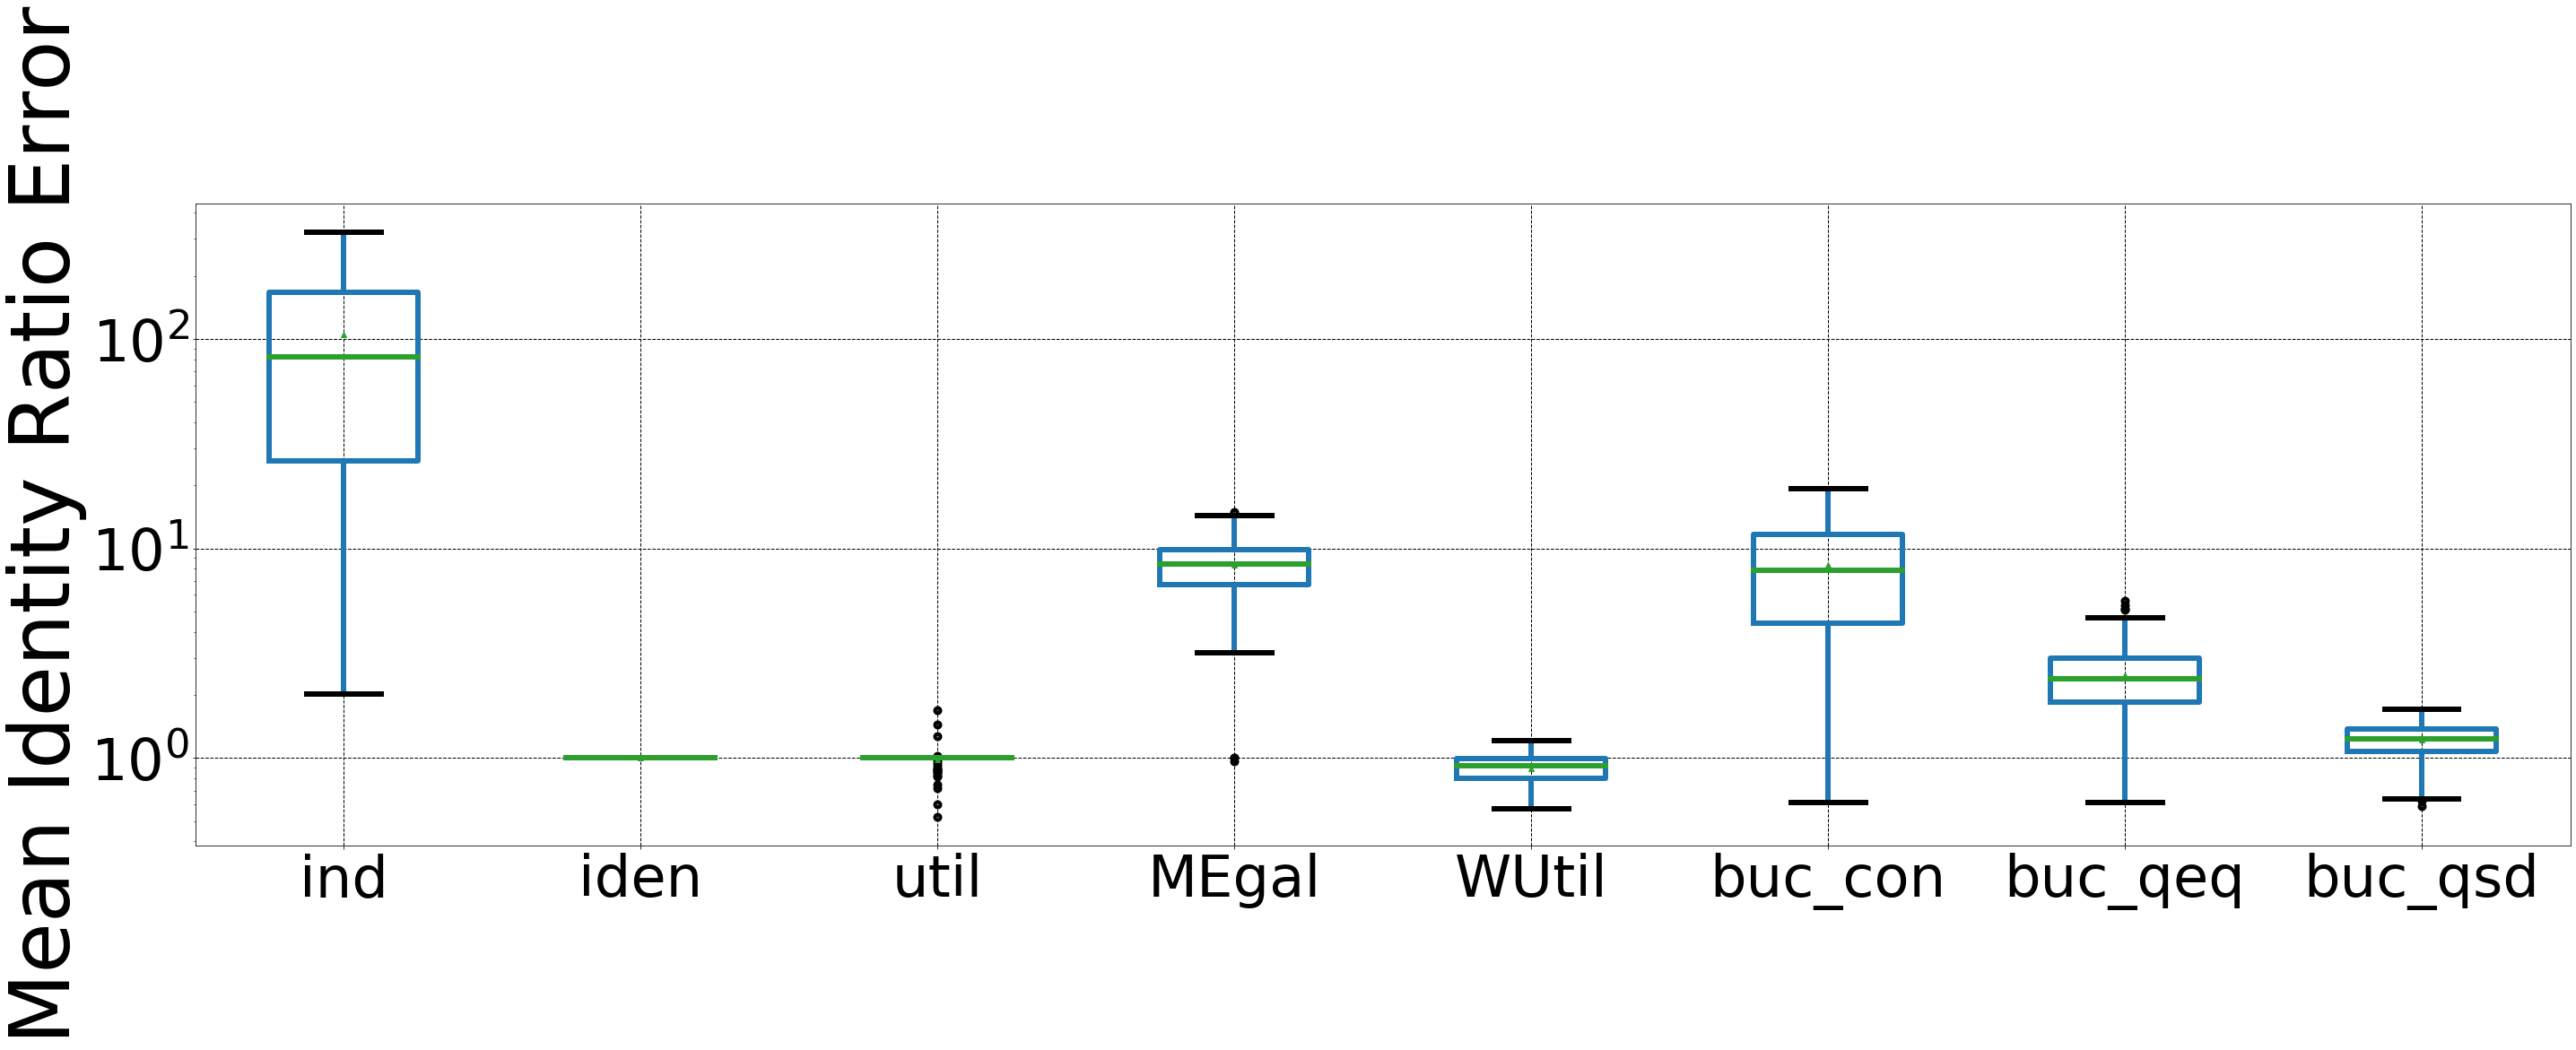

In [37]:
mean_idenratio_errors = data['mean_idenratio_errors']
mean_idenratio_errors.boxplot(column = modes, showmeans=True)
plt.xticks(range(1,len(modes)+1), mode_names)
plt.ylabel('Mean Identity Ratio Error')
plt.yscale('log')
plt.tight_layout()
#plt.savefig('figs/race_mean_ratio_errors.pdf')
plt.show()

In [38]:
max_idenratio_errors = data['max_idenratio_errors']
min_idenratio_errors = data['min_idenratio_errors']
diff_idenratio_errors = max_idenratio_errors.subtract(min_idenratio_errors)

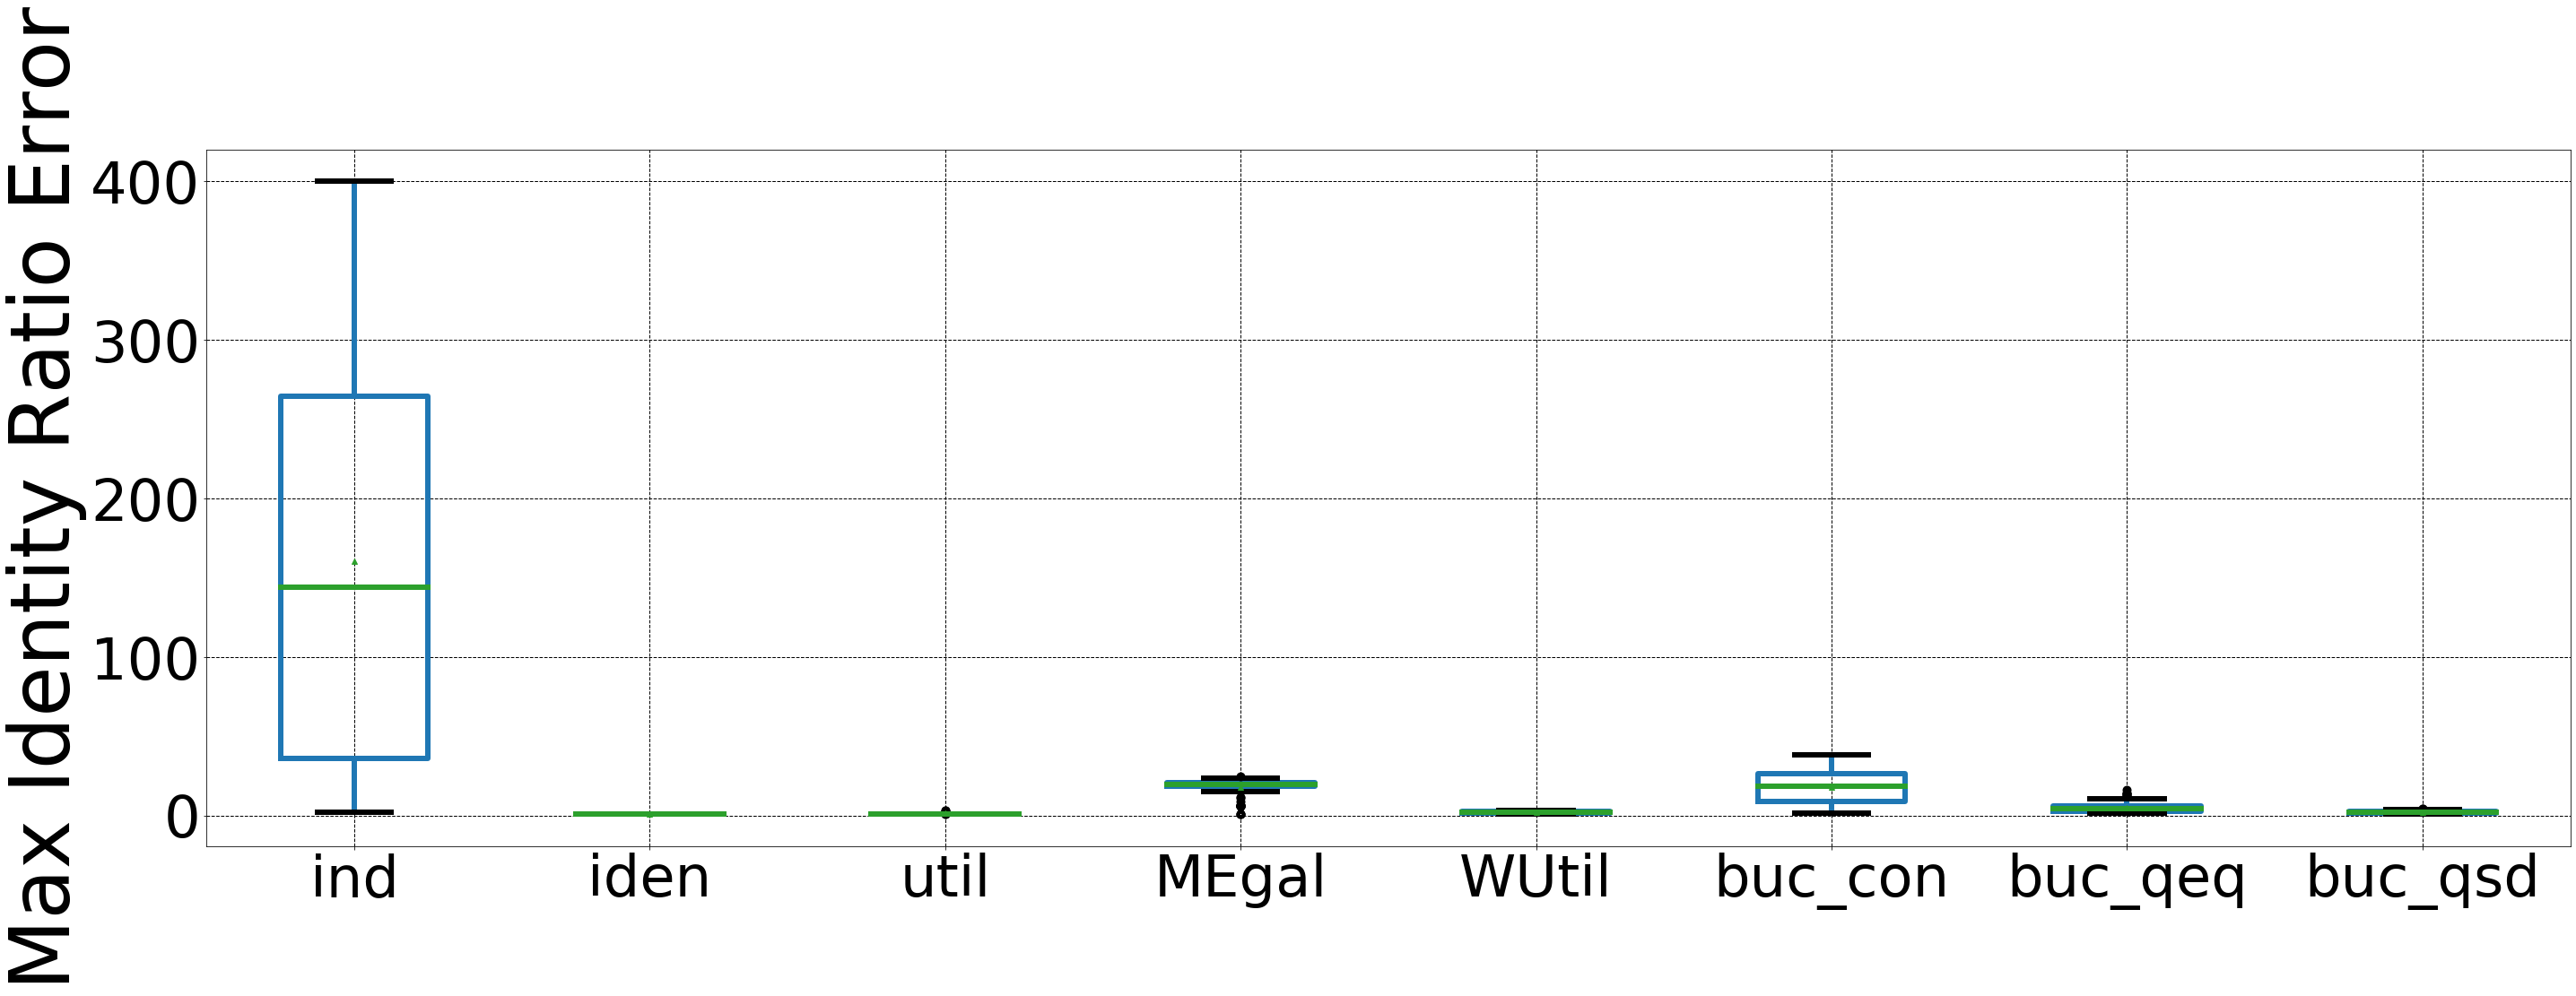

In [39]:
max_idenratio_errors.boxplot(column = modes, showmeans=True)
plt.xticks(range(1,len(modes)+1), mode_names)
plt.ylabel('Max Identity Ratio Error')
plt.tight_layout()
#plt.savefig('figs/race_mean_ratio_errors.pdf')
plt.show()

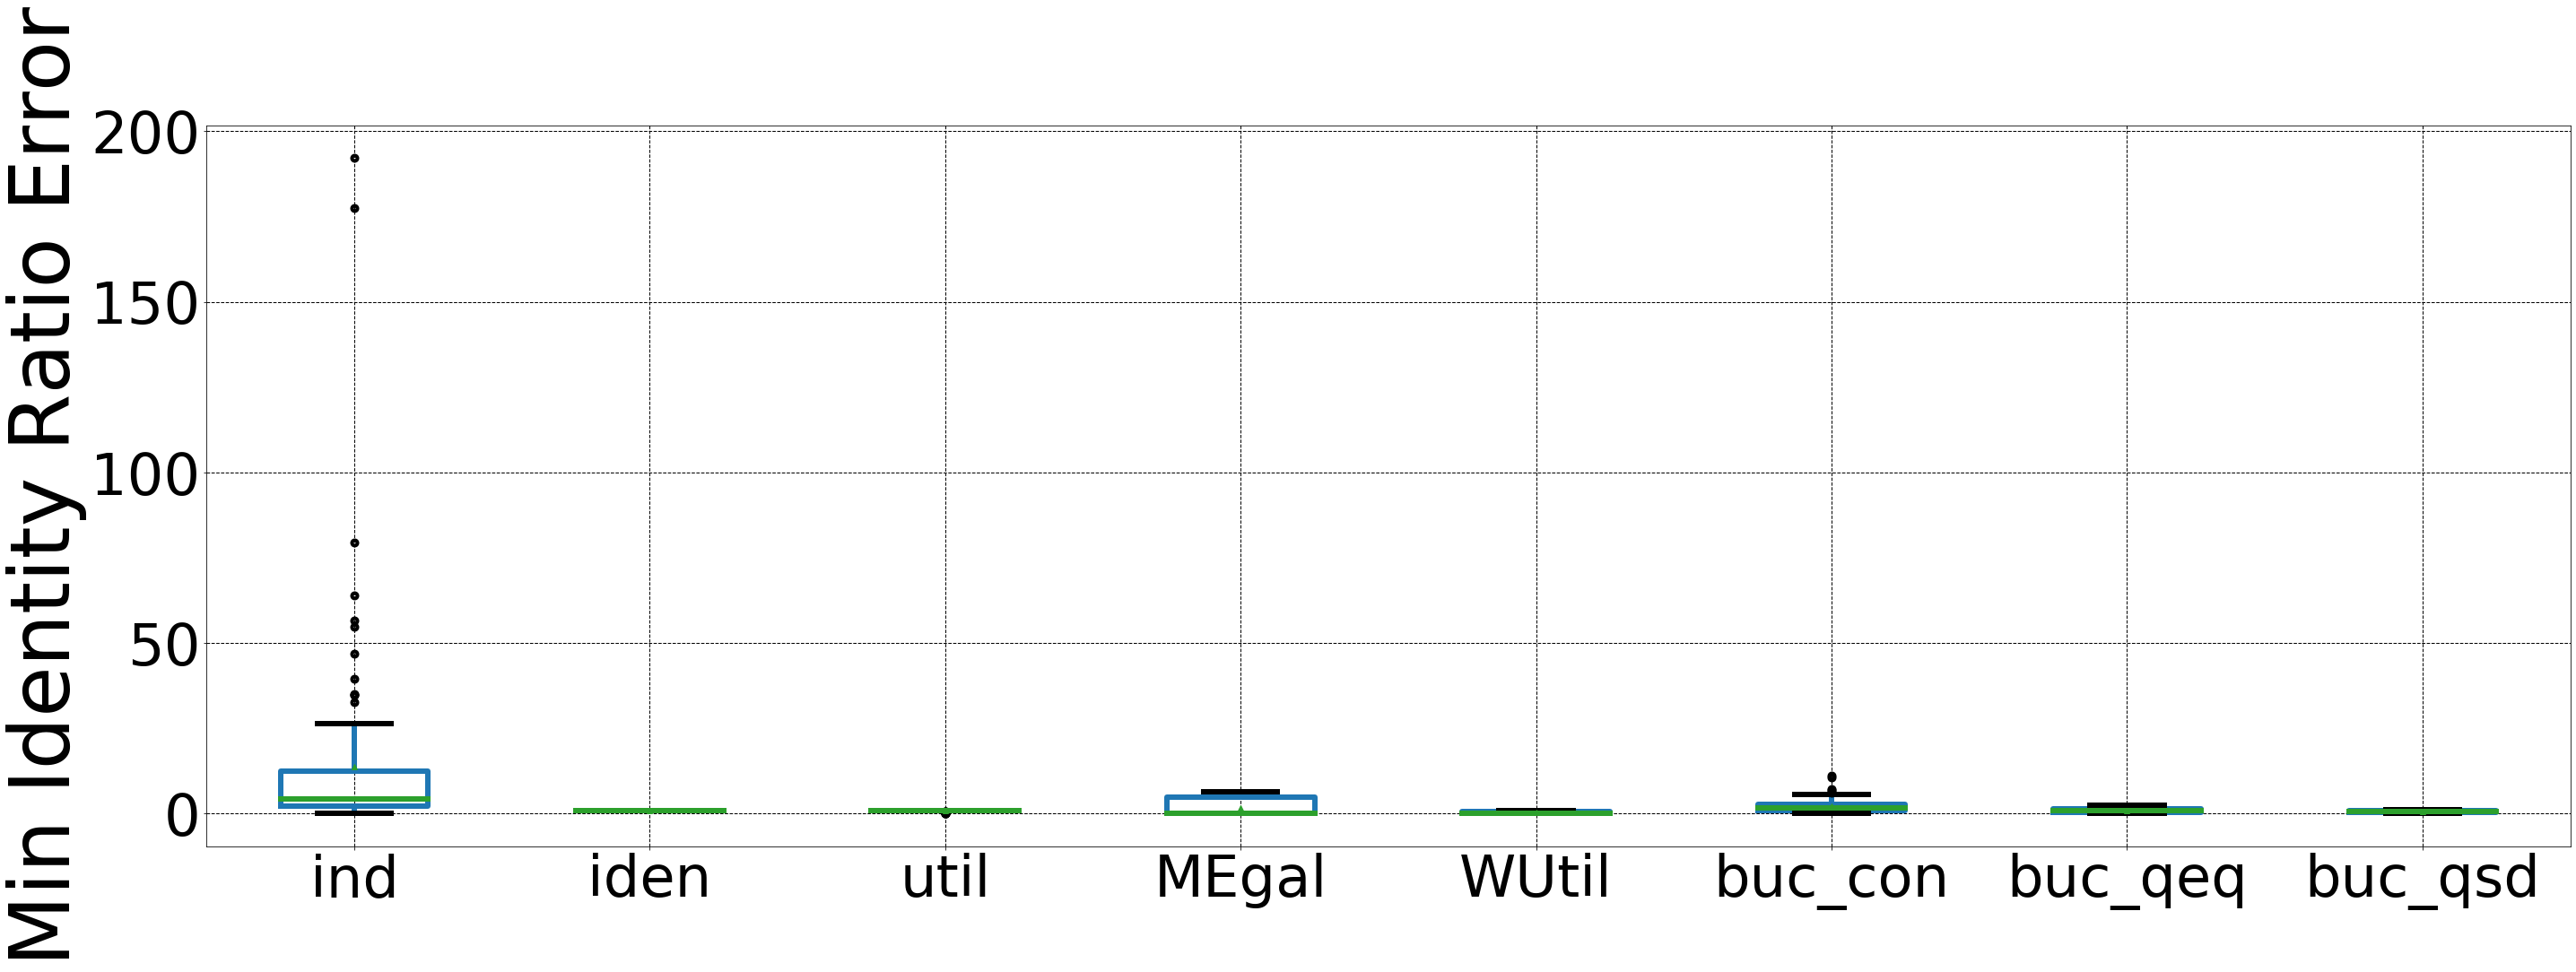

In [40]:
min_idenratio_errors.boxplot(column = modes, showmeans=True)
plt.xticks(range(1,len(modes)+1), mode_names)
plt.ylabel('Min Identity Ratio Error')
plt.tight_layout()
#plt.savefig('figs/race_mean_ratio_errors.pdf')
plt.show()

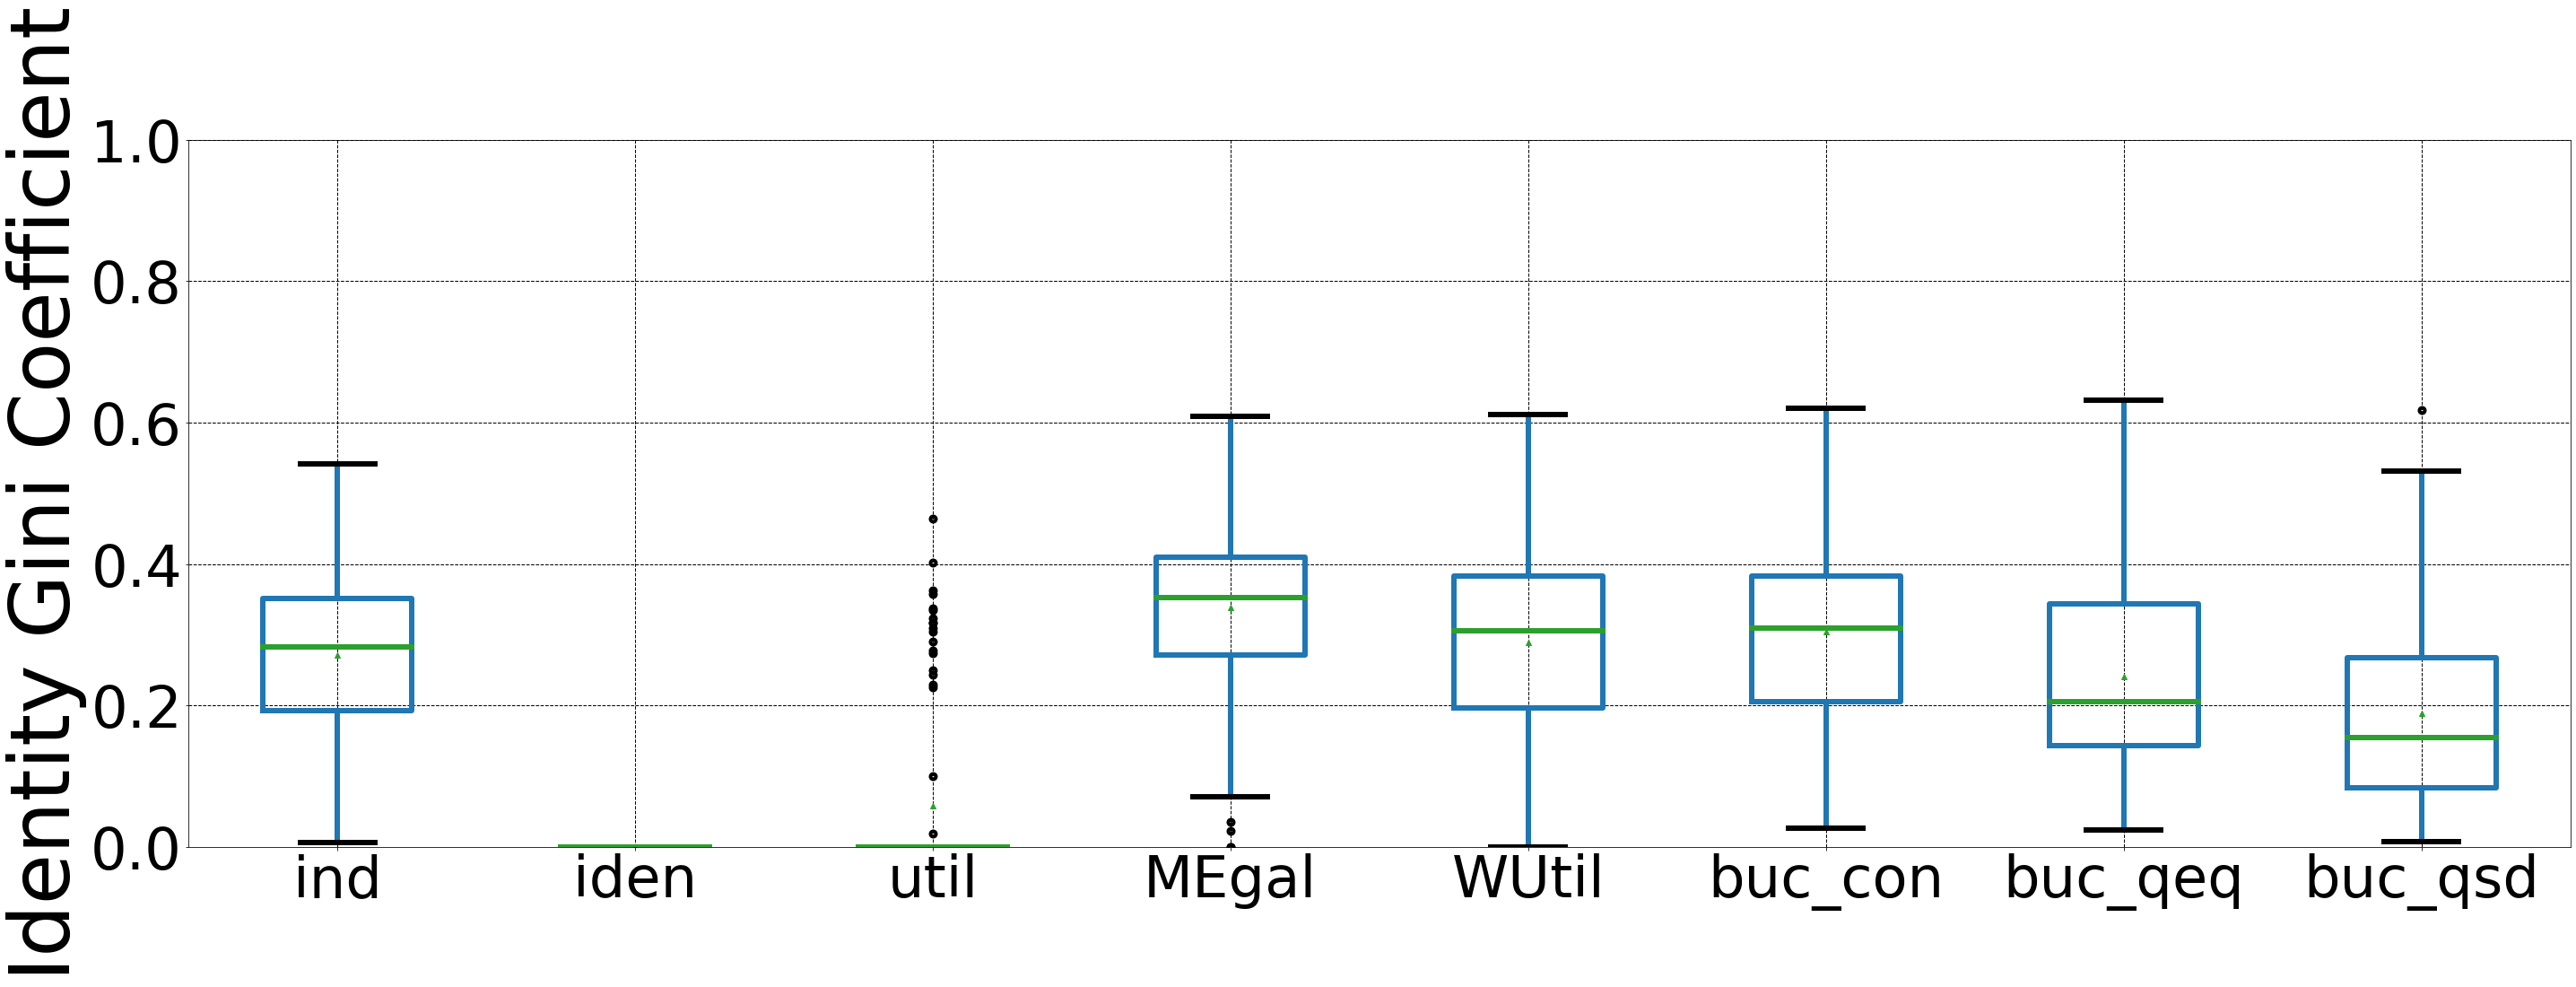

In [41]:
iden_gini_coefficients = data['iden_gini_coefficients']
iden_gini_coefficients.boxplot(column=modes, showmeans=True)
plt.xticks(range(1,len(modes)+1), mode_names)
plt.ylim((0,1.0))
plt.ylabel('Identity Gini Coefficient')
plt.tight_layout()
#plt.savefig('figs/race_gini.pdf')
plt.show()